## In this example, we will demonstrate how to generate a software retina and sample an image.

Mounting google drive to load test image <br>
Alternatively one can upload a picture using files -> upload to session storage on the left sidebar

In [1]:
from google.colab import drive
drive.mount("mnt")

Mounted at mnt


In [2]:
%cd "mnt/My Drive/MSci/50k"

/content/mnt/My Drive/MSci/50k


In [3]:
import numpy as np
from skimage import io
import cv2
import time

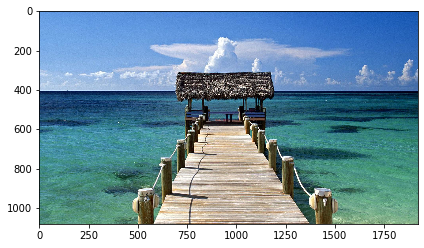

In [4]:
baseline_image = io.imread('dock.jpg')
io.imshow('dock.jpg')

Here we are installing the software retina package from PYPI. <br>
There is an existing issue which requires the external library (pynanoflann) to be manually installed

In [5]:
!pip install software-retina
!pip install git+https://github.com/u1234x1234/pynanoflann.git@0.0.5

     |████████████████████████████████| 378kB 13.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for software-retina: filename=software_retina-0.0.9-cp37-cp37m-linux_x86_64.whl size=909896 sha256=6feef2164d94ba44181c0845af3b16eab7a6c1f858539e033c4fc9da8f877c36
  Stored in directory: /root/.cache/pip/wheels/e8/72/05/038bd840a75f43d971a9718a7ec0b932c1e9b9f18549de7bfa
Successfully built software-retina
  Cloning https://github.com/u1234x1234/pynanoflann.git (to revision 0.0.5) to /tmp/pip-req-build-pzq3a8i6
  Running command git clone -q https://github.com/u1234x1234/pynanoflann.git /tmp/pip-req-build-pzq3a8i6
  Running command git checkout -q d62a16317d17fd91a4c36cd893c2a17cc7ca6e4f
  Running command git submodule update --init --recursive -q
  Created wheel for pynanoflann: filename=pynanoflann-0.0.5-cp37-cp37m-linux_x86_64.whl size=1451089 sha256=06b1bd7c80f70ab5f1a84376ebab9567fad4e3e2

### Generating a software retina of size 10000 (Method 1 - Self Similar Neural Network)

In [6]:
from src.software_retina_generation.ssnn import SelfSimilarNeuralNetwork

Initialising a Self similar neural network with parameters:


*   node_count = software retina size
*   foveal_region_size = size of the fovea centralis of the software retina
*   nearest_neighbour_method = automatically decides the appropriate method based on node_count



In [7]:
nanoflann_retina = SelfSimilarNeuralNetwork(node_count = 10000, foveal_region_size = 0.1, nearest_neighbour_method = "auto")
nanoflann_retina.fit()

# Returns a 2d array with of each row containing [x,y] coordinates of each node/point in the software retina
nanoflann_tessellation = nanoflann_retina.weights

print(nanoflann_tessellation)

Using nanoflann method.
20000/20000
Finished.
Time taken: 172.25853562355042
[[ 0.69754728  0.37469811]
 [ 0.58008539  0.43113884]
 [-0.09780546  0.19578159]
 ...
 [ 0.82619345  0.54221474]
 [ 0.0167217  -0.43615283]
 [-0.40598881  0.03671314]]


### Generating a software retina of size 10000 (Method 2 - Fibonacci Retina)

In [8]:
from src.software_retina_generation.fibonacci import fibonacci_retina

In [9]:
fibonaaci_tessellation = fibonacci_retina(node_count = 10000, foveal_region_size = 0.1, foveal_density=5)

print(fibonaaci_tessellation)

[[-1.17663667e-03 -1.07789558e-03]
 [ 2.41633667e-04  2.75329101e-03]
 [ 2.17099850e-03 -2.83168310e-03]
 ...
 [ 7.94008608e-01  6.06517242e-01]
 [-1.75854943e-01 -9.83987322e-01]
 [-5.35229835e-01  8.44706472e-01]]


Use software tessellation from method 1 or 2 to generate node attributes and kernel coefficients that are required for sampling.


In [10]:
from src.software_retina.rf_generation import node_attribute_kernel_generation

# Note: There are no optimal values for parameters (kernel_ratio, sigma_base, sigma_power and min_rf) yet.
node_attributes, coefficients = node_attribute_kernel_generation(nanoflann_tessellation, kernel_ratio = 3, sigma_base = 0.5, sigma_power = 1, min_rf = 1)

rf generation - might take a while...
5000 nodes in one chunk.
Processing chunk 0
Processing chunk 1
All chunks done.
Padding kernels now


Initialising retina, loading of node attributes and kernel coefficients

In [12]:
from src.software_retina.retina import Retina

retina = Retina(node_attributes, coefficients)

Sampling grayscale image

In [13]:
baseline_image_gray = cv2.cvtColor(baseline_image, cv2.COLOR_BGR2GRAY)

# The values (360, 640) represent a corresponding (y,x) point to fixate the software retina. You can change this to any pixel point of an image
# The value to fixate the retina in the example image above would be (500, 900)
intensity_values = retina.sample_grayscale(baseline_image_gray, (360, 640))

# Returns a 1d array of intensity values
print(intensity_values)

[ 53.80585355  92.91773594 185.80447065 ...  25.70926196 190.53887039
 205.28623852]


Sampling colour image

In [15]:
intensity_values = retina.sample_colour(baseline_image, (360.0, 640.0))

# Returns a 2d array of intensity values
print(intensity_values)

[[ 58.80197604  51.74770352  55.36063004]
 [102.72381456  92.45914385  90.00212928]
 [153.80447513 175.80447205 216.80446631]
 ...
 [ 35.70010154  25.36544107  22.25204312]
 [153.53244467 182.41515577 221.60686968]
 [180.53815297 197.04395911 231.43489637]]
